## 1. Import required packages

In [2]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error

from numpy import arange

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns',200) #allows for up to 200 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)
plt.style.use('seaborn-v0_8') # a style that can be used for plots - see style reference above
print(plt.style.available)

# trick to widen the screen
from IPython.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## 2. Import  the dataset DF_AH.csv and  Exploratory Data Analysis(15 points)
* The dataset DF_AH.csv is exported from the data data preprocessing notebook after we removed the outliars, and doing some feature engineering. This dataset contains 92 variables including the target variable.
* Do the exploratory data analysis to gain better insights on the data

In [3]:
df_AH = pd.read_csv("Dataset/DF_AH.csv")

df_AH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

## 3. Perform additional Feature Engineering(10 points)

1) Identify the unique number of foundation types

In [4]:
print(df_AH['Foundation'].unique())
print(len(df_AH['Foundation'].unique()))

['CBlock' 'PConc' 'Wood' 'BrkTil' 'Slab' 'Stone']
6


2) Create the dummy variable for the foundation type

In [5]:
foundation_dummies = pd.get_dummies(df_AH['Foundation'], prefix='Foundation_')
pd.concat([df_AH, foundation_dummies], axis=1)
df_AH = df_AH.drop('Foundation', axis=1)
df_AH.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


3) Identify the all the unique neighbourhood

In [6]:
print(df_AH['Neighborhood'].unique())
print(len(df_AH['Neighborhood'].unique()))

['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
28



4) Create the dummy variable for the neighbourhood

In [7]:
#Riccardo
neighborhood_dummies = pd.get_dummies(df_AH['Neighborhood'], prefix='Neighborhood_')
pd.concat([df_AH, neighborhood_dummies], axis=1)
df_AH = df_AH.drop('Neighborhood', axis=1)
df_AH.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,No,NaN,0,5,2010,WD,Normal,215000,2736.0,1656,62,2.0,1,1,1,0,0,0,1
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,1778.0,896,120,1.0,1,1,1,0,0,0,1
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,No,Gar2,12500,6,2010,WD,Normal,172000,2658.0,1329,36,1.5,1,1,1,0,0,0,1
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,No,NaN,0,4,2010,WD,Normal,244000,4220.0,2110,0,3.5,1,1,0,0,0,0,1
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,2557.0,1629,34,2.5,1,1,1,0,1,0,1


5) Look at the DF_AH.info() and drop all the variables that have Non-Null count less than 2500.

In [8]:
#Riccardo
df_AH = df_AH.loc[:, df_AH.count() >= 2500]
df_AH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   MS SubClass      2925 non-null   int64  
 2   MS Zoning        2925 non-null   object 
 3   Lot Frontage     2925 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Street           2925 non-null   object 
 6   Lot Shape        2925 non-null   object 
 7   Land Contour     2925 non-null   object 
 8   Utilities        2925 non-null   object 
 9   Lot Config       2925 non-null   object 
 10  Land Slope       2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built    

## 4.  Impute the data (10 points)

1) Check whether each of the variables have missing values


In [9]:
#Riccardo
df_AH.isnull().sum()

PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage         0
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
Bsmt Qual           79
Bsmt Cond           79
Bsmt Exposure       82
BsmtFin Type 1      79
BsmtFin SF 1         0
BsmtFin Type 2      80
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full B

1746


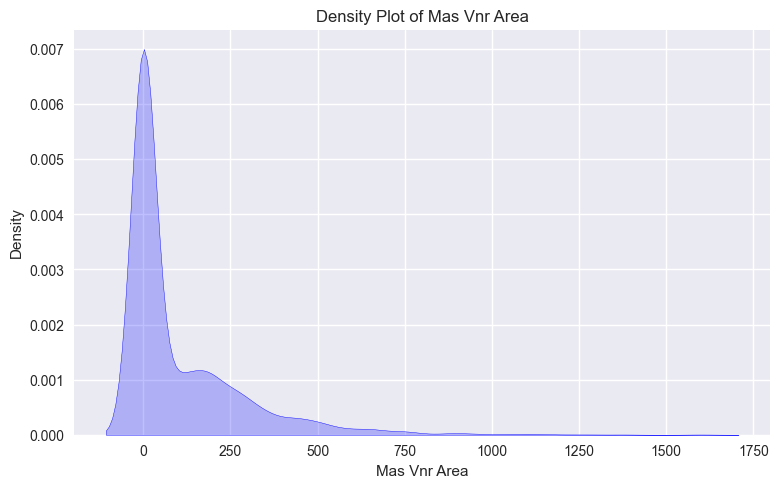

In [10]:
# why is Mas Vnr Area null?

# this shows that null is not meant to represent 0, since MsVnrArea has several values that are 0. 
# This implies that Mas Vnr Area is null by mistake
isMsVnrZero = df_AH[df_AH['Mas Vnr Area'] == 0]
print(len(isMsVnrZero)) 

# since null doesn't signify 0, we do a describe to see which imputation method would be best
df_AH['Mas Vnr Area'].describe()

# this shows that it is massively right skewed, so median is a better choice of imputation than average
plt.figure(figsize=(8,5))
sns.kdeplot(df_AH["Mas Vnr Area"].dropna(), color='blue', fill=True)

plt.xlabel("Mas Vnr Area")
plt.ylabel("Density")
plt.title("Density Plot of Mas Vnr Area")
plt.show()

In [11]:
# investigate into why electrical is null
electricNull = df_AH[df_AH['Electrical'].isnull()]
electricNull.head()

print(df_AH['Electrical'].unique())

['SBrkr' 'FuseA' 'FuseF' 'FuseP' nan 'Mix']


In [12]:
# investigate into why Bsmt Full/Half Bath are null
bsmtFullNull = df_AH[df_AH['Bsmt Full Bath'].isnull()] 
bsmtHalfNull = df_AH[df_AH['Bsmt Half Bath'].isnull()] 
bsmtFullNull.head()
bsmtHalfNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
1496,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,No,0,7,2008,WD,Normal,284700,3820.0,3820,372,NaN,0,1,1,0,1,0,1


In [13]:
# investigation into why TotalBathrooms is null
totalBathNull = df_AH[df_AH['TotalBathrooms'].isnull()]
totalBathNull.head()
# this ^ shows that it seems like the data just was corrupted, however it seems that it can be easily filled
# by adding the half bath number and full bath number

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
1496,908154080,20,RL,123.0,47007,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,No,0,7,2008,WD,Normal,284700,3820.0,3820,372,NaN,0,1,1,0,1,0,1


In [14]:
# investigation into why basement values are null

# since all of these values are categorical and lack a "No basement" equivalent field,
# that's probably what null is supposed to mean
print(df_AH['Bsmt Qual'].unique())
print(df_AH['Bsmt Cond'].unique())
print(df_AH['Bsmt Exposure'].unique())
print(df_AH['BsmtFin Type 1'].unique())
print(df_AH['BsmtFin Type 2'].unique())

['TA' 'Gd' 'Ex' nan 'Fa' 'Po']
['Gd' 'TA' nan 'Po' 'Fa' 'Ex']
['Gd' 'No' 'Mn' 'Av' nan]
['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]
['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']


In [15]:
# investigation into why garage values are null

# here we can see that these also lack a "No garage" value like the basements. 
print(df_AH['Garage Type'].unique())
print(df_AH['Garage Finish'].unique())
print(df_AH['Garage Cars'].unique())
print(df_AH['Garage Qual'].unique())
print(df_AH['Garage Cond'].unique())


# an exception is the garage cars and garage area fields, which both only have 1 null value.
# this would imply that they are null by mistake

['Attchd' 'BuiltIn' 'Basment' 'Detchd' nan 'CarPort' '2Types']
['Fin' 'Unf' 'RFn' nan]
[ 2.  1.  3.  0.  4.  5. nan]
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


In [16]:
# this shows that all of the data for this row seems to be corrupted
garageCarNull = df_AH[df_AH['Garage Cars'].isnull()]
garageCarNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
2231,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909,2687.0,1828,212,2.0,1,0,1,0,1,0,1


In [17]:
# this is the same row as the garage car corruption
garageAreaNull = df_AH[df_AH['Garage Area'].isnull()]
garageCarNull.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,TotalSF,TotalFloorSF,TotalPorchSF,TotalBathrooms,HasBasement,HasGarage,HasPorch,HasPool,WasRemodeled,IsNew,WasCompleted
2231,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,Alloca,150909,2687.0,1828,212,2.0,1,0,1,0,1,0,1


2) Impute the missing values using appropriate method and explain why you use that method?

In [18]:
# delete the corrupted line since there's only one line that has been corrupted
df_AH = df_AH[df_AH['PID'] != 910201180]

In [19]:
# For all of the categorical data missing a not applicable field, a value of "NA" is added instead of null
df_AH['Bsmt Qual'].fillna("NA", inplace=True)
df_AH['Bsmt Cond'].fillna("NA", inplace=True)
df_AH['Bsmt Exposure'].fillna("NA", inplace=True)
df_AH['BsmtFin Type 1'].fillna("NA", inplace=True)
df_AH['BsmtFin Type 2'].fillna("NA", inplace=True)
df_AH['Garage Type'].fillna("NA", inplace=True)
df_AH['Garage Finish'].fillna("NA", inplace=True)
df_AH['Garage Qual'].fillna("NA", inplace=True)
df_AH['Garage Cond'].fillna("NA", inplace=True)

In [20]:
# inpute 0 for GarageYrBuilt to signify that there is no garage
df_AH['Garage Yr Blt'].fillna(0, inplace=True)

In [21]:
# for Mas Vnr Area, do median as imputation since it is massively right skewed
msVnrAreaMedian = df_AH['Mas Vnr Area'].median()
df_AH['Mas Vnr Area'].fillna(msVnrAreaMedian, inplace=True)

In [22]:
# for electrical, Bsmt Full Bath, and Bsmt Half Bath delete rows since they are an insignificant
# amount of the data that seems to be corrupted
cols_to_drop = ['Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath']
df_AH = df_AH.dropna(subset=cols_to_drop)

In [23]:
# for total bath, fill in missing value with 4: 3 Full bathrooms, 1 Half bathroom
df_AH['TotalBathrooms'].fillna(4, inplace=True)

In [24]:
df_AH.isnull().sum()

PID                0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr

3) Look at the data and for remaining categorical variable, create the dummy variable, or drop the variable. Explain your reasoning.

In [25]:
def create_dummies(df, col):
    dummies = pd.get_dummies(df[col], prefix=(col + "_"))
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(col, axis=1)
    return df
    

In [26]:
object_columns = df_AH.select_dtypes(include=['object']).columns
for obj in object_columns:
    df_AH = create_dummies(df_AH, obj)

19


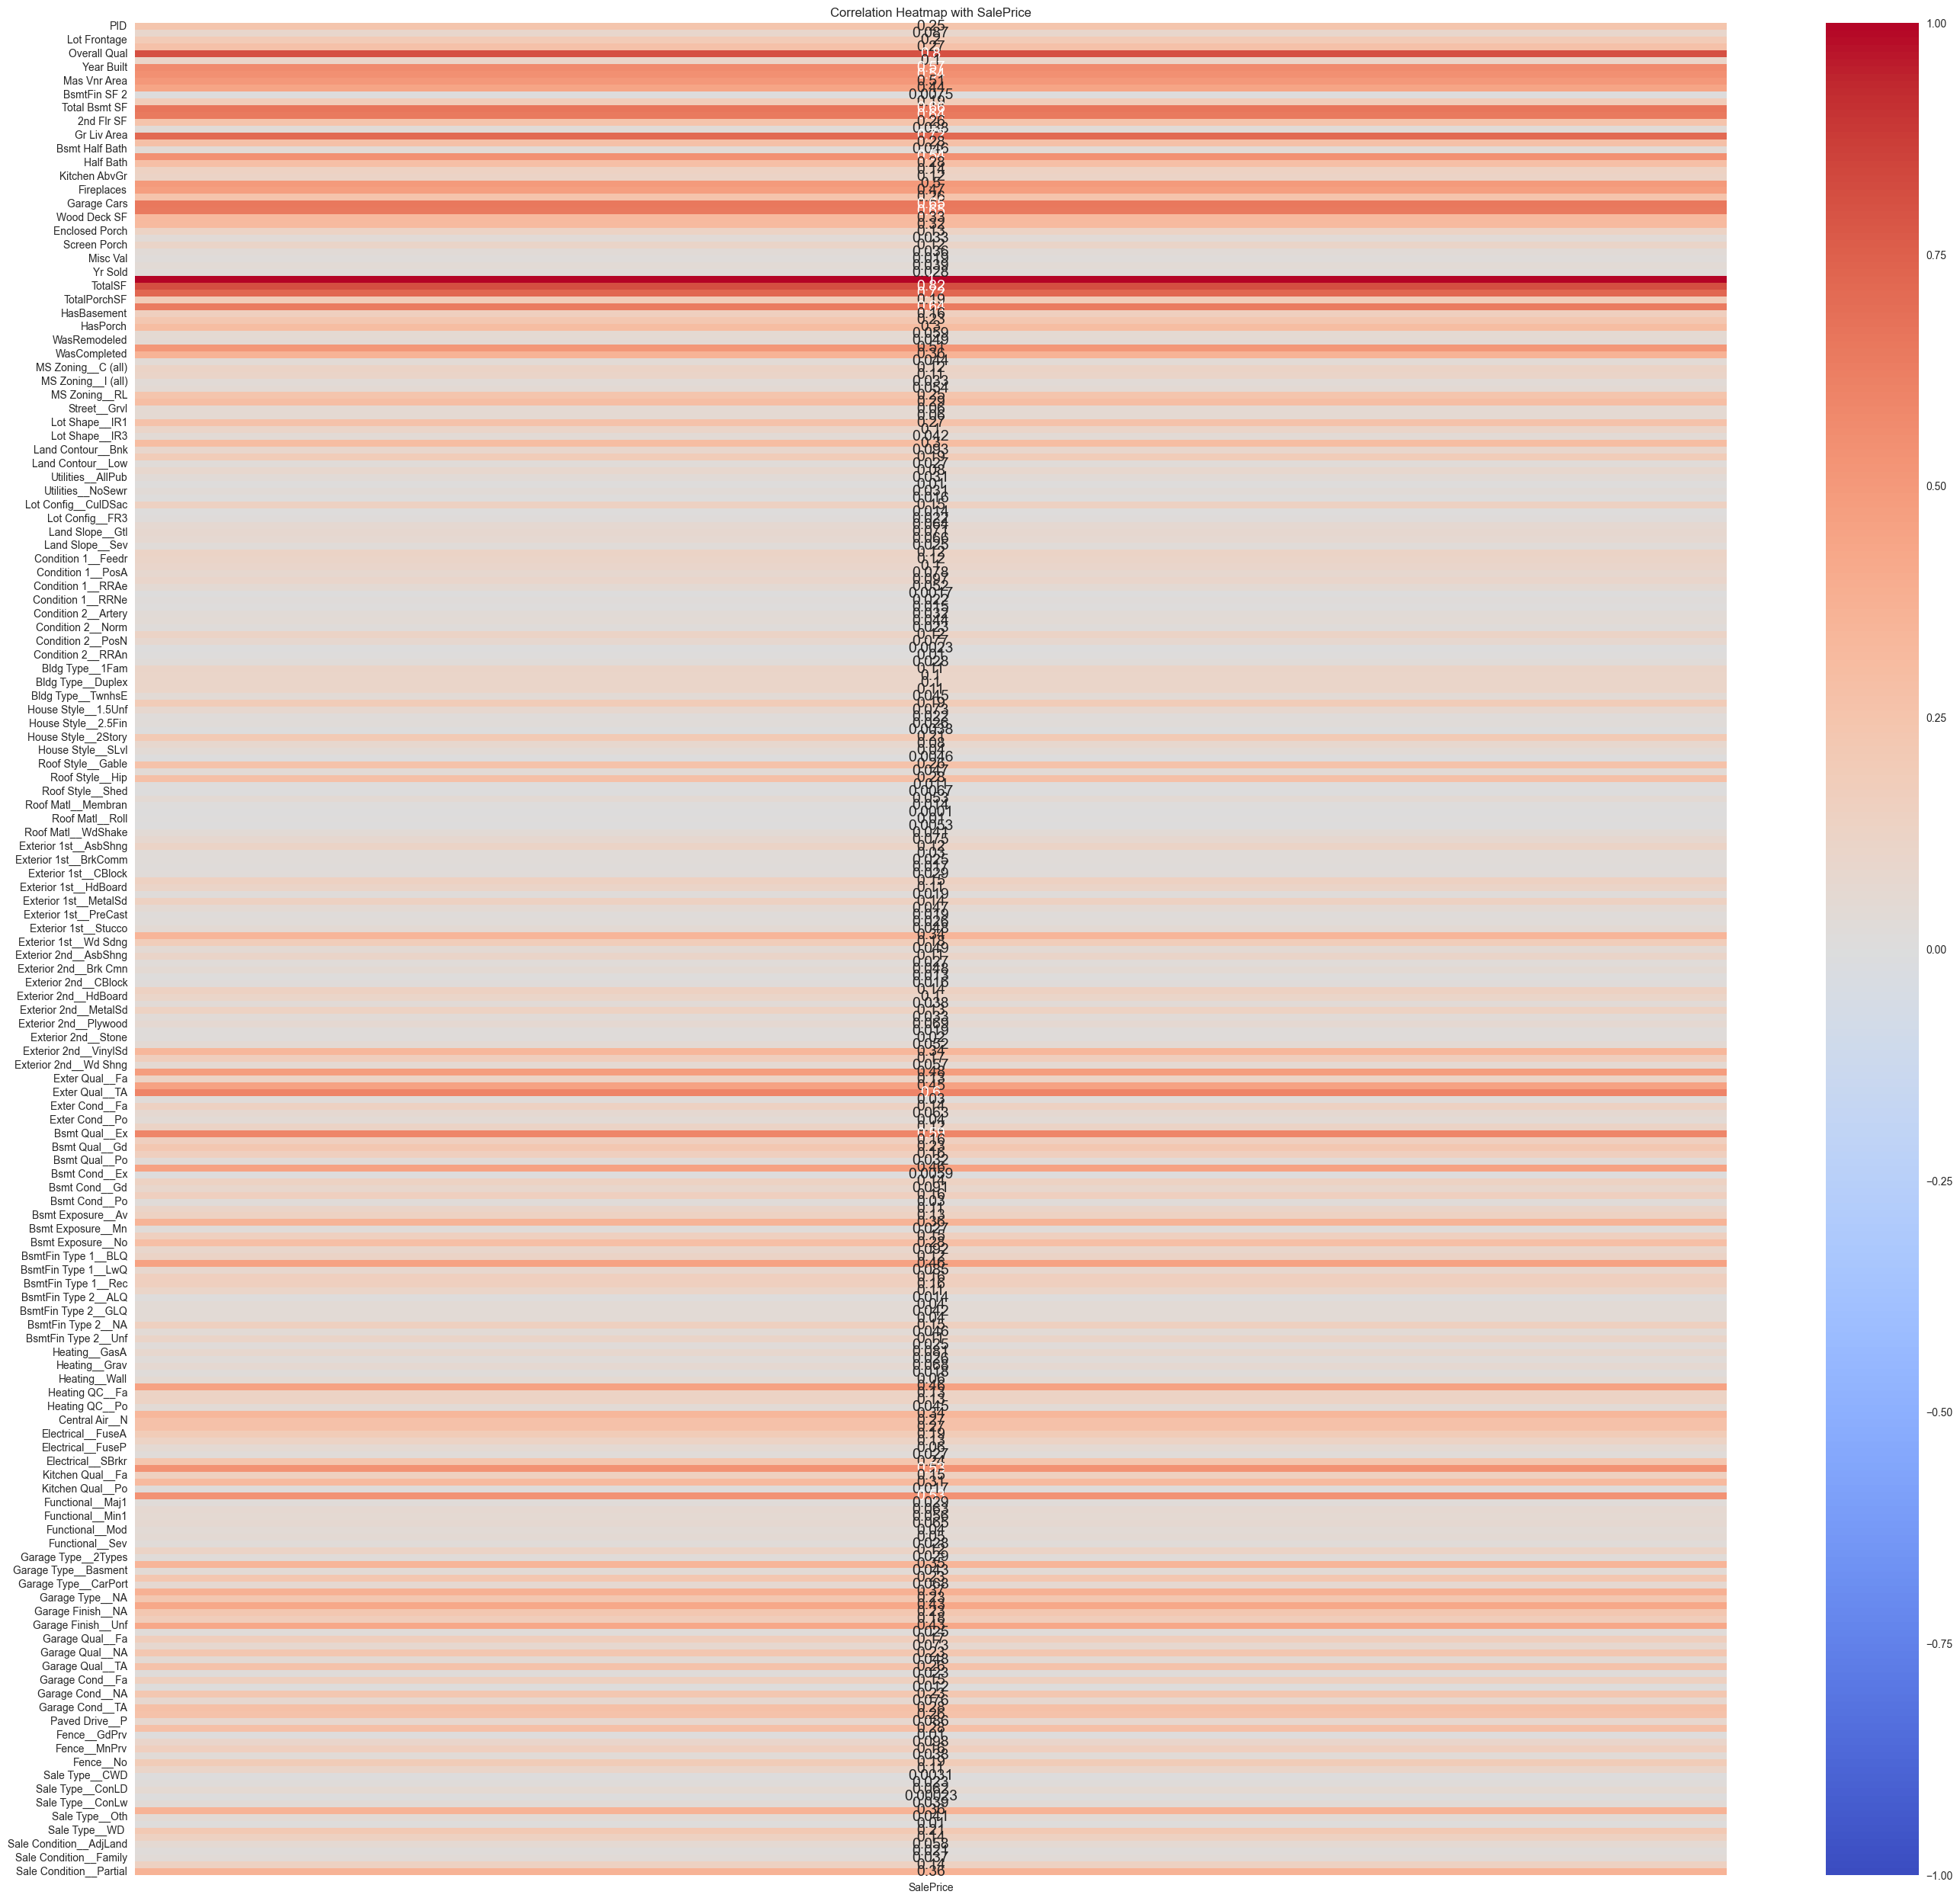

In [27]:
correlation_matrix = df_AH.corr()

correlation_with_saleprice = correlation_matrix[['SalePrice']].abs()
filtered_features = correlation_with_saleprice[correlation_with_saleprice['SalePrice'] >= 0.5].index

print(len(filtered_features))


# Plot the heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_with_saleprice, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with SalePrice')
plt.show()

In [28]:
display(filtered_features)

df_AH = df_AH[filtered_features]
df_AH.info()

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Cars', 'Garage Area', 'SalePrice', 'TotalSF', 'TotalFloorSF',
       'TotalBathrooms', 'IsNew', 'Exter Qual__TA', 'Bsmt Qual__Ex',
       'Kitchen Qual__Ex', 'Kitchen Qual__TA'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 2922 entries, 0 to 2924
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Overall Qual      2922 non-null   int64  
 1   Year Built        2922 non-null   int64  
 2   Year Remod/Add    2922 non-null   int64  
 3   Mas Vnr Area      2922 non-null   float64
 4   Total Bsmt SF     2922 non-null   float64
 5   1st Flr SF        2922 non-null   int64  
 6   Gr Liv Area       2922 non-null   int64  
 7   Full Bath         2922 non-null   int64  
 8   Garage Cars       2922 non-null   float64
 9   Garage Area       2922 non-null   float64
 10  SalePrice         2922 non-null   int64  
 11  TotalSF           2922 non-null   float64
 12  TotalFloorSF      2922 non-null   int64  
 13  TotalBathrooms    2922 non-null   float64
 14  IsNew             2922 non-null   int64  
 15  Exter Qual__TA    2922 non-null   bool   
 16  Bsmt Qual__Ex     2922 non-null   bool   
 17  

In [29]:
df_AH.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Cars,Garage Area,SalePrice,TotalSF,TotalFloorSF,TotalBathrooms,IsNew,Exter Qual__TA,Bsmt Qual__Ex,Kitchen Qual__Ex,Kitchen Qual__TA
0,6,1960,1960,112.0,1080.0,1656,1656,1,2.0,528.0,215000,2736.0,1656,2.0,0,True,False,False,True
1,5,1961,1961,0.0,882.0,896,896,1,1.0,730.0,105000,1778.0,896,1.0,0,True,False,False,True
2,6,1958,1958,108.0,1329.0,1329,1329,1,1.0,312.0,172000,2658.0,1329,1.5,0,True,False,False,False
3,7,1968,1968,0.0,2110.0,2110,2110,2,2.0,522.0,244000,4220.0,2110,3.5,0,False,False,True,False
4,5,1997,1998,0.0,928.0,928,1629,2,2.0,482.0,189900,2557.0,1629,2.5,0,True,False,False,True


## 5. Create the train/test data and scaling (5 points)

1) Split the data into training and test set with training on 80 percent. You may use the following code 


In [30]:
X = df_AH.drop('SalePrice', axis = 1) #keep features only for X
y = df_AH['SalePrice'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

2) Standardize the data using standard scaler, then you will be building the regression models suing the scaled data.

In [31]:
#Riccardo and Chandler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
def metrics_chart(values):
    metrics = ["RMSE", "MAPE", "R2 Score"]

    # Create figure and table
    fig, ax = plt.subplots(figsize=(4, 2))
    ax.axis('tight')
    ax.axis('off')
    table_data = [[metrics[i], f"{values[i]:.4f}"] for i in range(len(metrics))]
    table = ax.table(cellText=table_data, colLabels=["Metric", "Value"], cellLoc="center", loc="center")

    plt.show()

## 6.  Build the Multiple Regression Model (10 points)

(a)  Build a multiple regression model using backwards elimination. To do this follow the following steps:

(1) Build initial model 

In [33]:
X_reg = X_train_scaled
y_reg = y_train

X_reg.reset_index(drop=True, inplace=True)
y_reg.reset_index(drop=True, inplace=True)

X_reg = sm.add_constant(X_reg) # adding a constant
 
initial_model = sm.OLS(y_reg, X_reg).fit()
pred = initial_model.predict(X_reg) 
 
initial_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     920.5
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:35:37   Log-Likelihood:                -27208.
No. Observations:                2337   AIC:                         5.445e+04
Df Residuals:                    2319   BIC:                         5.456e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.799e+05    571.811    314.557      0.000    1.79e+05    1.81e+05
Overall Qual       1.79e+04   1013.388     17.663      0.000    1.59e+04    1.99e+04
Year Built        5890.0103    966.345      6.095      0.000    3995.020    7785.001
Year Remod/Add    5674.5884    844.185      6.722      0.000    4019.152    7330.025
Mas Vnr Area      3442.3012    671.328      5.128      0.000    2125.835    4758.767
Total Bsmt SF     6024.7475   1565.317      3.849      0.000    2955.181    9094.314
1st Flr SF        4581.8679   1019.215      4.495      0.000    2583.199    6580.536
Gr Liv Area       3813.9231   4827.178      0.790      0.430   -5652.113    1.33e+04
Full Bath        -8634.2394    938.593     -9.199      0.000   -1.05e+04   -6793.671
Garage Cars       1054.7109   1326.522      0.795      0.427   -1546.582    3656.004
Garage Area       6263.4278   1272.575      4.922      0.000    3767.924    8758.932
TotalSF           5786.1678   2404.300      2.407      0.016    1071.367    1.05e+04
TotalFloorSF      1.677e+04   6395.402      2.622      0.009    4228.843    2.93e+04
TotalBathrooms    8470.7374    946.834      8.946      0.000    6614.007    1.03e+04
IsNew             -784.5848    917.722     -0.855      0.393   -2584.226    1015.056
Exter Qual__TA   -2092.8261    937.420     -2.233      0.026   -3931.095    -254.558
Bsmt Qual__Ex     9140.9770    755.908     12.093      0.000    7658.651    1.06e+04
Kitchen Qual__Ex  8289.3787    719.533     11.521      0.000    6878.384    9700.373
Kitchen Qual__TA -3316.0032    836.472     -3.964      0.000   -4956.314   -1675.693
==============================================================================
Omnibus:                      369.195   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3170.700
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       8.626   Cond. No.                     7.04e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.05e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(2) Review p-values

    - if a p-value is > 0.05 then eliminate the highest p-value and go to step 3
    - **if all p-values are less than 0.05 then your model is complete**

In [34]:
def view_pvals(model):
    # Print all of the pvalues for the variables
    p_values = model.pvalues[1:]
    for pred, pval in p_values.items():
        print(f"{pred}: {pval:.4f}")

In [35]:
view_pvals(initial_model)

Overall Qual: 0.0000
Year Built: 0.0000
Year Remod/Add: 0.0000
Mas Vnr Area: 0.0000
Total Bsmt SF: 0.0001
1st Flr SF: 0.0000
Gr Liv Area: 0.4296
Full Bath: 0.0000
Garage Cars: 0.4266
Garage Area: 0.0000
TotalSF: 0.0162
TotalFloorSF: 0.0088
TotalBathrooms: 0.0000
IsNew: 0.3927
Exter Qual__TA: 0.0257
Bsmt Qual__Ex: 0.0000
Kitchen Qual__Ex: 0.0000
Kitchen Qual__TA: 0.0001


In [36]:
def backward_elimination(X_train, y_train, significance_level=0.05):
    # Reset indices to ensure alignment to take care of index issues after scaling
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    
    # Add the constant
    X_train = sm.add_constant(X_train)

    # Fit the initial model
    ols_model = sm.OLS(y_train, X_train).fit()

    # Set the initial variable for the while loop
    max_p_value = 0.99
    iteration = 0
    excluded_features = []

    # Build the while loop under the condition that the max p-value needs to be greater than the significance level
    while max_p_value > significance_level:
        p_values = ols_model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()

        if max_p_value > significance_level:
            max_p_value_predictor = p_values.idxmax()
            excluded_features.append(max_p_value_predictor)

            # Create a new DataFrame with the remaining features and add the constant
            X_subset = X_train.drop(columns=excluded_features)
            X_subset = sm.add_constant(X_subset)

            ols_model = sm.OLS(y_train, X_subset).fit()
            iteration += 1
            print(f"Iteration {iteration}: Max p-value = {max_p_value}, Removed feature: {max_p_value_predictor}")

    # Display the final summary
    model_summary = ols_model.summary()
    print(model_summary)

    return ols_model, excluded_features

In [37]:
trimmed_model, excluded_features = backward_elimination(X_reg, y_reg)

Iteration 1: Max p-value = 0.4295538496376602, Removed feature: Gr Liv Area
Iteration 2: Max p-value = 0.6180861320031281, Removed feature: Total Bsmt SF
Iteration 3: Max p-value = 0.42792179559460086, Removed feature: Garage Cars
Iteration 4: Max p-value = 0.4027551666238476, Removed feature: IsNew
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:35:37   Log-Likelihood:                -27209.
No. Observations:                2337   AIC:                         5.445e+04
Df Residuals:                    2322   BIC:                         5.453e+04
Df Model:                          14                              

In [38]:
X_train_scaled.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Cars', 'Garage Area', 'TotalSF', 'TotalFloorSF',
       'TotalBathrooms', 'IsNew', 'Exter Qual__TA', 'Bsmt Qual__Ex',
       'Kitchen Qual__Ex', 'Kitchen Qual__TA'],
      dtype='object')

In [39]:
results = trimmed_model.params.reset_index()
results = pd.DataFrame(results)
stat_sig_Pred = results['index'].values
display(stat_sig_Pred)
stat_sig_Pred = np.delete(stat_sig_Pred, 0)
stat_sig_Pred = stat_sig_Pred[~np.isin(stat_sig_Pred, excluded_features)]
stat_sig_Pred

array(['const', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', '1st Flr SF', 'Full Bath', 'Garage Area',
       'TotalSF', 'TotalFloorSF', 'TotalBathrooms', 'Exter Qual__TA',
       'Bsmt Qual__Ex', 'Kitchen Qual__Ex', 'Kitchen Qual__TA'],
      dtype=object)

array(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       '1st Flr SF', 'Full Bath', 'Garage Area', 'TotalSF',
       'TotalFloorSF', 'TotalBathrooms', 'Exter Qual__TA',
       'Bsmt Qual__Ex', 'Kitchen Qual__Ex', 'Kitchen Qual__TA'],
      dtype=object)

In [40]:
print(len(stat_sig_Pred))

14


(3) Build a new model without eliminated independent variable

In [41]:
trimmed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 28 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:35:37   Log-Likelihood:                -27209.
No. Observations:                2337   AIC:                         5.445e+04
Df Residuals:                    2322   BIC:                         5.453e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.799e+05    571.636    314.654      0.000    1.79e+05    1.81e+05
Overall Qual      1.796e+04   1005.050     17.872      0.000     1.6e+04    1.99e+04
Year Built        5798.2246    908.607      6.381      0.000    4016.460    7579.989
Year Remod/Add    5575.6387    834.574      6.681      0.000    3939.051    7212.226
Mas Vnr Area      3514.3324    667.540      5.265      0.000    2205.296    4823.369
1st Flr SF        4665.6602   1010.211      4.619      0.000    2684.650    6646.670
Full Bath        -8743.1245    920.678     -9.496      0.000   -1.05e+04   -6937.687
Garage Area       7048.1667    761.906      9.251      0.000    5554.080    8542.253
TotalSF           1.637e+04   1802.149      9.081      0.000    1.28e+04    1.99e+04
TotalFloorSF      1.388e+04   1362.083     10.192      0.000    1.12e+04    1.66e+04
TotalBathrooms    8684.7094    922.752      9.412      0.000    6875.205    1.05e+04
Exter Qual__TA   -1882.4990    905.612     -2.079      0.038   -3658.392    -106.606
Bsmt Qual__Ex     9028.6355    740.974     12.185      0.000    7575.595    1.05e+04
Kitchen Qual__Ex  8205.8301    716.107     11.459      0.000    6801.555    9610.105
Kitchen Qual__TA -3225.0819    830.246     -3.884      0.000   -4853.182   -1596.982
==============================================================================
Omnibus:                      363.022   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3092.697
Skew:                           0.466   Prob(JB):                         0.00
Kurtosis:                       8.558   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(4) Go back to step 2

In [42]:
view_pvals(trimmed_model)

Overall Qual: 0.0000
Year Built: 0.0000
Year Remod/Add: 0.0000
Mas Vnr Area: 0.0000
1st Flr SF: 0.0000
Full Bath: 0.0000
Garage Area: 0.0000
TotalSF: 0.0000
TotalFloorSF: 0.0000
TotalBathrooms: 0.0000
Exter Qual__TA: 0.0378
Bsmt Qual__Ex: 0.0000
Kitchen Qual__Ex: 0.0000
Kitchen Qual__TA: 0.0001


(b) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [43]:
coefficients = trimmed_model.params
intercept = coefficients[0]

predictors = coefficients.index[1:]  # Exclude the intercept
coef_values = coefficients.values[1:]

regression_equation = f"SalePrice = {intercept:.4f}\n"
for pred, coef in zip(predictors, coef_values):
    regression_equation += f" + ({coef:.4f} * {pred})\n"

# Print the final equation
print(regression_equation)

SalePrice = 179867.2122
 + (17962.3523 * Overall Qual)
 + (5798.2246 * Year Built)
 + (5575.6387 * Year Remod/Add)
 + (3514.3324 * Mas Vnr Area)
 + (4665.6602 * 1st Flr SF)
 + (-8743.1245 * Full Bath)
 + (7048.1667 * Garage Area)
 + (16366.1286 * TotalSF)
 + (13882.9691 * TotalFloorSF)
 + (8684.7094 * TotalBathrooms)
 + (-1882.4990 * Exter Qual__TA)
 + (9028.6355 * Bsmt Qual__Ex)
 + (8205.8301 * Kitchen Qual__Ex)
 + (-3225.0819 * Kitchen Qual__TA)




(5) As we used the validation set approach here, predict the y values in the test data and report the following measures of accuracy.

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
Please interpret these values.

Note: To keep the readability of Jupyter notebook, please include the initial model and the final model for the multiple regression using backward elimination.

In [44]:
trimmed_cols = stat_sig_Pred
print(trimmed_cols)

['Overall Qual' 'Year Built' 'Year Remod/Add' 'Mas Vnr Area' '1st Flr SF'
 'Full Bath' 'Garage Area' 'TotalSF' 'TotalFloorSF' 'TotalBathrooms'
 'Exter Qual__TA' 'Bsmt Qual__Ex' 'Kitchen Qual__Ex' 'Kitchen Qual__TA']


In [46]:
X_train_trimmed = X_train_scaled[trimmed_cols]
X_test_trimmed = X_test_scaled[trimmed_cols]

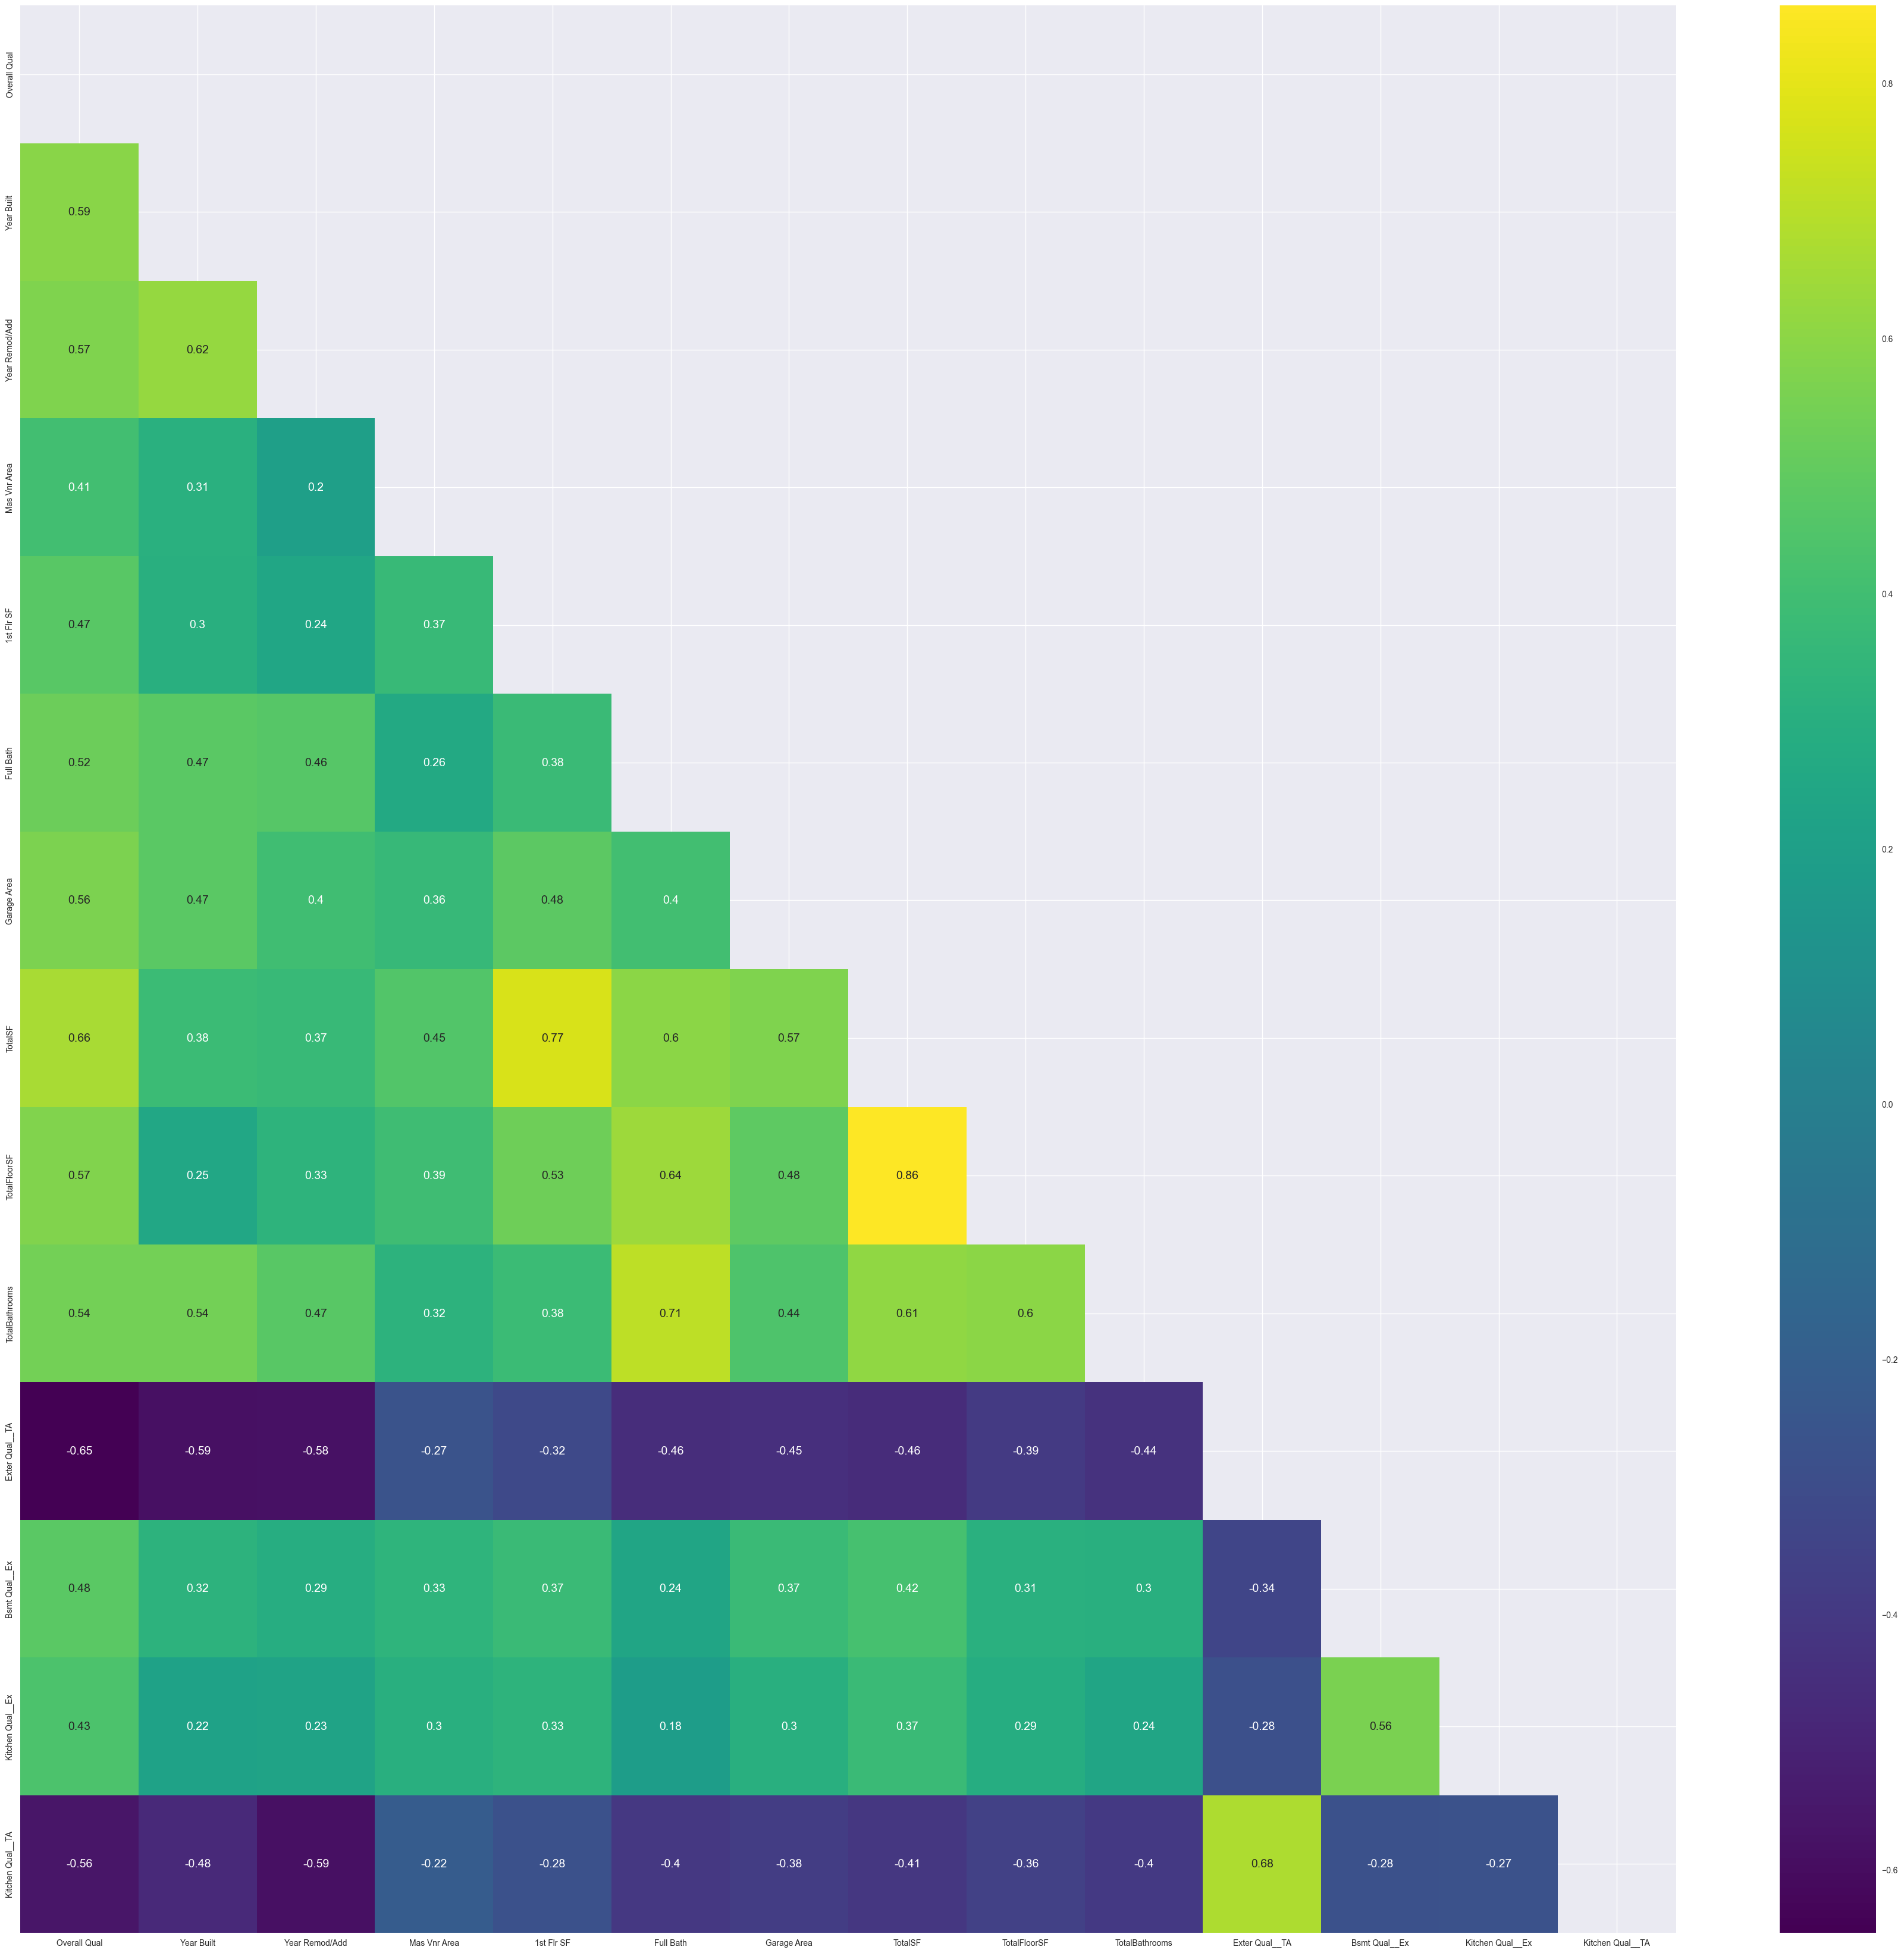

In [47]:
fig = plt.figure(figsize=(40, 40))
mask = np.triu(np.ones_like(X_train_trimmed.corr()))  
sns.heatmap(
    X_train_trimmed.corr(), 
    cmap="viridis",                 
    annot=True,                     
    mask=mask                   
)
plt.show()

In [48]:
X_test_trimmed = sm.add_constant(X_test_trimmed)
y_hat_test_trimmed = trimmed_model.predict(X_test_trimmed)

In [49]:
test_mse = mean_squared_error(y_test, y_hat_test_trimmed)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_hat_test_trimmed)
test_r_squared = r2_score(y_test, y_hat_test_trimmed)
test_mape = mean_absolute_percentage_error(y_test, y_hat_test_trimmed)

print(f'The test RMSE is:\t{round(test_rmse, 3)}')
print(f'The test MAE is:\t{round(test_mae, 3)}')
print(f'The test Rsquared is:\t{round(test_r_squared, 4)}')
print(f'The test MAPE is:\t{round(test_mape, 4)}')
# print(f' the train MAPE is:\t{round (train_mape, 4)}')

The test RMSE is:	32423.028
The test MAE is:	19354.579
The test Rsquared is:	0.8566
The test MAPE is:	0.1127


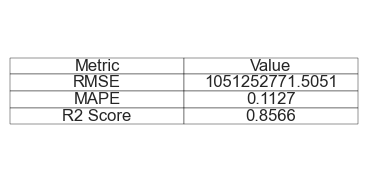

In [50]:
values = [test_mse, test_mape, test_r_squared]
metrics_chart(values)

(585,)


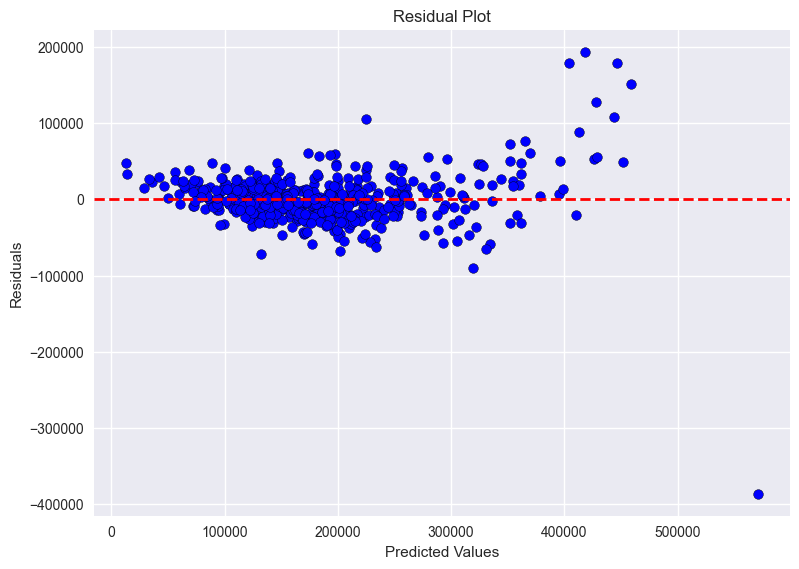

In [51]:
# Calculate residuals
y_test = y_test.reset_index(drop=True)
residuals_linear = y_test - y_hat_test_trimmed
print(residuals_linear.shape)

# Residual plot: residuals vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_hat_test_trimmed, residuals_linear, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # Horizontal line at 0 for reference
plt.xlabel('Predicted Values')  # X-axis: Predicted values from the model
plt.ylabel('Residuals')  # Y-axis: Difference between actual and predicted values
plt.title('Residual Plot')  # Title of the plot
plt.show()

## 7. Build the LASSO Regression Model(10 points)

(a)  Build a LASSO regression model using all the variables that you used initially in your multiple linear regression model. You are advised to use the grid search CV(5 fold) on training data to find the best value of lambda. Then report the following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?


In [52]:
#Riccardo
alpha_values = np.arange(0, 1000, 3)

cv = RepeatedKFold(n_splits=5, random_state=42)

lasso_model = Lasso()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(lasso_model, param_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")

Best alpha value: 216


In [53]:
#Riccardo
lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_best.predict(X_test_scaled)

lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mape = mean_absolute_percentage_error(y_test, y_pred_lasso)


print(f"RMSE: {lasso_rmse:.4f}")
print(f"MAPE: {lasso_mape:.4f}")
print(f"R2: {lasso_r2:.4f}")

RMSE: 32464.0917
MAPE: 0.1120
R2: 0.8562


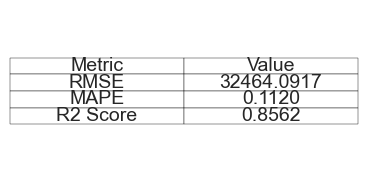

In [54]:
metrics_chart([lasso_rmse, lasso_mape, lasso_r2])

(b) Identify the variables with the non zero regression coefficients. Are they the same as the one that is statistically insignificant in multiple linear regression model?

In [55]:
#Riccardo
lasso_coefficients = pd.Series(lasso_best.coef_, index=X.columns)
non_zero_coefficients = lasso_coefficients[lasso_coefficients != 0]

print("Variables with Non-Zero Coefficients in LASSO Regression:")
print(non_zero_coefficients)

Variables with Non-Zero Coefficients in LASSO Regression:
Overall Qual        17948.358117
Year Built           5519.772250
Year Remod/Add       5422.492255
Mas Vnr Area         3461.745577
1st Flr SF           4412.856878
Full Bath           -7721.391110
Garage Cars           921.131720
Garage Area          6342.052272
TotalSF             16908.282451
TotalFloorSF        13095.925339
TotalBathrooms       8169.002366
Exter Qual__TA      -1771.246018
Bsmt Qual__Ex        8996.450036
Kitchen Qual__Ex     8170.094614
Kitchen Qual__TA    -3165.017418
dtype: float64


(c) Write the regression equation where Saleprice is a dependent(target) variable and all the statistically significant predictors as independent variable.

In [56]:
#Riccardo
intercept = lasso_best.intercept_
equation = "SalePrice = {:.4f}".format(intercept)  # Intercept

for var, coef in non_zero_coefficients.items():
    equation += " + {:.4f} * {}".format(coef, var)

print("LASSO Regression Equation:")
print(equation)

LASSO Regression Equation:
SalePrice = 179867.2122 + 17948.3581 * Overall Qual + 5519.7723 * Year Built + 5422.4923 * Year Remod/Add + 3461.7456 * Mas Vnr Area + 4412.8569 * 1st Flr SF + -7721.3911 * Full Bath + 921.1317 * Garage Cars + 6342.0523 * Garage Area + 16908.2825 * TotalSF + 13095.9253 * TotalFloorSF + 8169.0024 * TotalBathrooms + -1771.2460 * Exter Qual__TA + 8996.4500 * Bsmt Qual__Ex + 8170.0946 * Kitchen Qual__Ex + -3165.0174 * Kitchen Qual__TA


## 8. Build the Ridge Regression Model(10 points)

(a)  Build the Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best lambda obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values? 

In [57]:
#Riccardo
ridge = Ridge()

alpha_values = np.arange(0, 1000, 3)

param_grid = {'alpha': alpha_values}

cv = RepeatedKFold(n_splits=5, random_state=42)

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best alpha value: {best_alpha}")
print(f"Best score (neg mean squared error): {best_score}")

c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=5.35758e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.04221e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.52991e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\chand\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.14616e-17): result may not be accurate.
  return linalg.solve

Best alpha value: 33
Best score (neg mean squared error): -775914634.1442251


In [58]:
#Riccardo
ridge_best = Ridge(alpha=best_alpha)

ridge_best.fit(X_train_scaled, y_train)

Ridge(alpha=np.int64(33))

In [59]:
y_pred_ridge = ridge_best.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_pred_ridge)

print(f"RMSE: {ridge_rmse}")
print(f"R2: {ridge_r2}")
print(f"MAPE: {ridge_mape}")

RMSE: 32444.687715784527
R2: 0.8564097622129085
MAPE: 0.11204977683370793


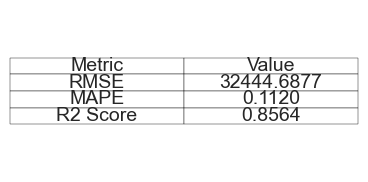

In [60]:
metrics_chart([ridge_rmse, ridge_mape, ridge_r2])

(b) Identify the regression coefficients of all variables. What is the difference you noticed between the Lasso and the Ridge regression coefficients?


In [61]:
# Riccardo
ridge_coefficients = pd.Series(ridge_best.coef_, index=X.columns)
coeff_comparison = pd.DataFrame({'LASSO': lasso_coefficients, 'Ridge': ridge_coefficients})
print("Comparison of LASSO and Ridge Coefficients:")
print(coeff_comparison)

Comparison of LASSO and Ridge Coefficients:
                         LASSO         Ridge
Overall Qual      17948.358117  17425.392297
Year Built         5519.772250   5839.039475
Year Remod/Add     5422.492255   5628.794809
Mas Vnr Area       3461.745577   3558.334268
Total Bsmt SF         0.000000   4988.377925
1st Flr SF         4412.856878   4586.447396
Gr Liv Area           0.000000   7869.029064
Full Bath         -7721.391110  -8123.096427
Garage Cars         921.131720   1441.382005
Garage Area        6342.052272   6025.132136
TotalSF           16908.282451   7831.050140
TotalFloorSF      13095.925339  11142.689162
TotalBathrooms     8169.002366   8239.497516
IsNew                -0.000000   -692.186019
Exter Qual__TA    -1771.246018  -2200.841206
Bsmt Qual__Ex      8996.450036   9099.211140
Kitchen Qual__Ex   8170.094614   8279.711971
Kitchen Qual__TA  -3165.017418  -3359.196110


(c) Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable. Note: Since the value of coefficient may be very small, you may round the coefficient to two decimal places and use the non zero coefficients.

In [62]:
#Riccardo
intercept = round(ridge_best.intercept_, 2)  # Round intercept
equation = f"SalePrice = {intercept}"

for var, coef in ridge_coefficients.items():
    equation += f" + ({coef}) * {var}"

print("Ridge Regression Equation:")
print(equation)

Ridge Regression Equation:
SalePrice = 179867.21 + (17425.392296655547) * Overall Qual + (5839.039475273189) * Year Built + (5628.794809478081) * Year Remod/Add + (3558.334268164963) * Mas Vnr Area + (4988.377925299391) * Total Bsmt SF + (4586.447396145008) * 1st Flr SF + (7869.0290640681515) * Gr Liv Area + (-8123.096427320364) * Full Bath + (1441.382004584645) * Garage Cars + (6025.132136412499) * Garage Area + (7831.050139564022) * TotalSF + (11142.68916214457) * TotalFloorSF + (8239.497515623516) * TotalBathrooms + (-692.1860185783152) * IsNew + (-2200.8412058728) * Exter Qual__TA + (9099.21114001536) * Bsmt Qual__Ex + (8279.711970769462) * Kitchen Qual__Ex + (-3359.1961096107943) * Kitchen Qual__TA


## 9. Build the Kernel Ridge Regression Model(10 points)

https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html

(a)  Build the Kernel Ridge regression model using all the variables that you used initially in your multiple linear regression model together with the best values of tuning parameters obtained by grid search CV(5 fold)  on the training data. 
Please report the scores of following measures on the test dataset:

     - Root Mean Squared Error
     - Mean Absolute Percentage Error
     - R squared
How do you interpret these values?


In [ ]:
# Riccardo
kr = KernelRidge()

param_grid = {
    'alpha': np.logspace(-4, 1, 20),
    'kernel': ['poly', 'rbf',], 
    'degree': [2, 3], 
    'gamma': np.logspace(-4, 1, 20)
}

grid_search = GridSearchCV(kr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters from GridSearchCV:", best_params)

In [ ]:
# Riccardo
kr_best = KernelRidge(**best_params)
kr_best.fit(X_train_scaled, y_train)

KernelRidge(alpha=np.float64(1.623776739188721),
            gamma=np.float64(0.0069519279617756054), kernel='poly')

In [ ]:
#Riccardo
y_pred_kernel = kr_best.predict(X_test_scaled)

kernel_rmse = np.sqrt(mean_squared_error(y_test, y_pred_kernel))
kernel_mape = mean_absolute_percentage_error(y_test, y_pred_kernel)
kernel_r2 = r2_score(y_test, y_pred_kernel)

print(f'RMSE: {kernel_rmse}')
print(f'MAPE: {kernel_mape}')
print(f'R2: {kernel_r2}')

RMSE: 38788.886671459055
MAPE: 0.09015028328476342
R2: 0.7947645645945244


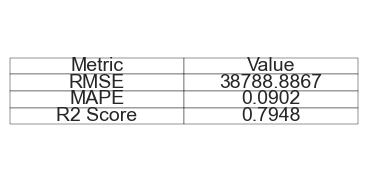

In [ ]:
metrics_chart([kernel_rmse, kernel_mape, kernel_r2])

(b) By conducting the error analysis, what is the difference you noticed with the previous models?

In [ ]:
# Riccardo
print(f"Multiple Regression - MSE: {test_mse}, RMSE: {test_rmse}, R²: {test_r_squared}")
print(f"LASSO - MSE: {lasso_mse}, RMSE: {lasso_rmse}, R²: {lasso_r2}")
print(f"Ridge - MSE: {ridge_mse}, RMSE: {ridge_rmse}, R²: {ridge_r2}")
print(f"Kernel Ridge - MSE: {kernel_mse}, RMSE: {kernel_rmse}, R²: {kernel_r2}")

Multiple Regression - MSE: 7298240641163989.0, RMSE: 85429740.96392888, R²: -995532.5418053886
LASSO - MSE: 988324963.2797292, RMSE: 31437.63609560568, R²: 0.8653993648766904
Ridge - MSE: 982490993.7011291, RMSE: 31344.71237228265, R²: 0.8659810238053229
Kernel Ridge - MSE: 1504577729.2113008, RMSE: 38788.88667145914, R²: 0.7947645645945235


(c)  Write the regression equation with Saleprice as a dependent(target) variable and all the predictors as independent variable, if possible.

In [ ]:
#Riccardo
if best_params['kernel'] == 'linear':
    coefficients = pd.Series(kr_best.coef_, index=X.columns)
    intercept = kr_best.intercept_
    equation = f"SalePrice = {intercept} + " + " + ".join([f"({coef}) * {var}" for var, coef in coefficients.items()])
    print("Kernel Ridge Regression Equation:", equation)

## 10. Model Comparison and Conclusion (20 points)

 (a) Create the visualizations of the residuals from the multiple regression, LASSO regression, Ridge regression and Kernel Ridge regression. You can create several visuals that are useful to gain insights on the residuals of each models separately or together. Explain what you observe from these graphs.

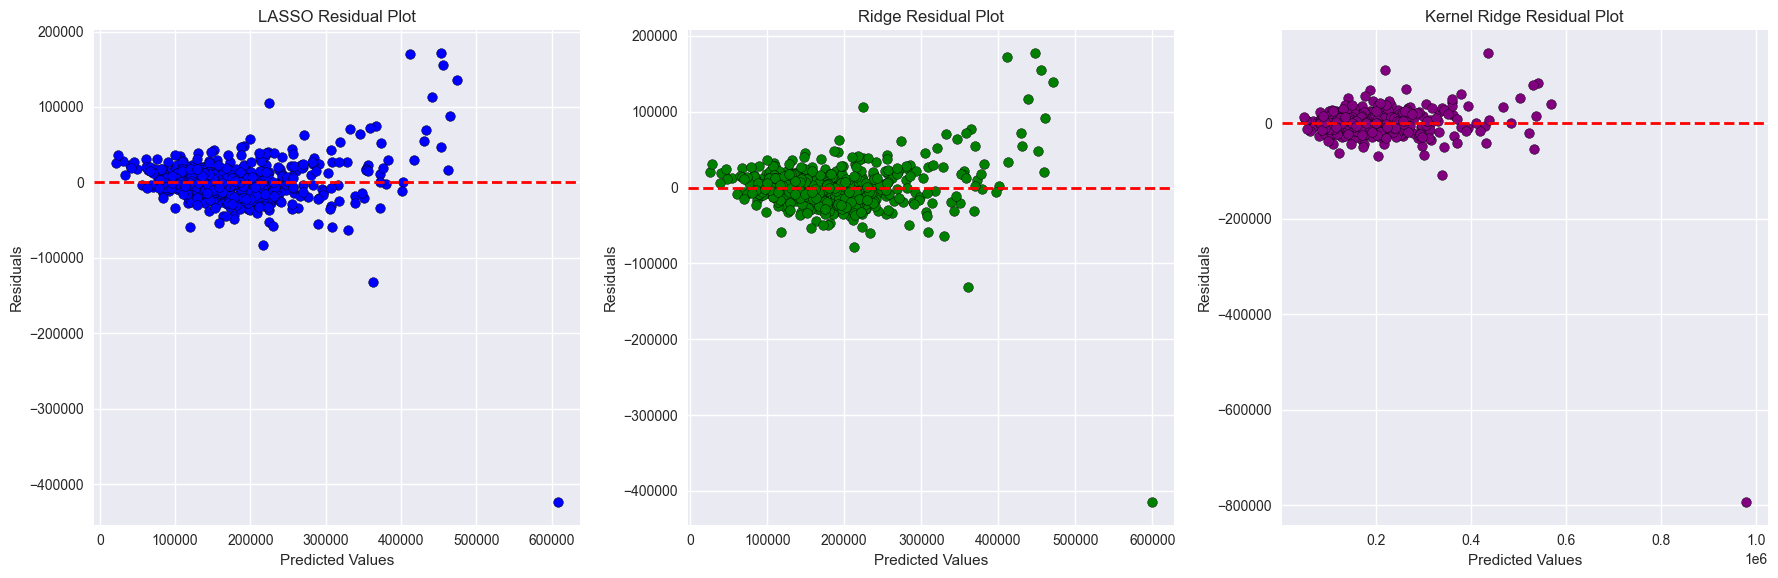

In [ ]:
residuals_lasso = y_test - y_pred_lasso
residuals_ridge = y_test - y_pred_ridge
residuals_kr = y_test - y_pred_kernel

plt.figure(figsize=(18, 6))

# LASSO Residual Plot
plt.subplot(1, 3, 1)
plt.scatter(y_pred_lasso, residuals_lasso, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('LASSO Residual Plot')

# Ridge Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_ridge, residuals_ridge, color='green', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Residual Plot')

# Kernel Ridge Residual Plot
plt.subplot(1, 3, 3)
plt.scatter(y_pred_kernel, residuals_kr, color='purple', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Kernel Ridge Residual Plot')

plt.tight_layout()
plt.show()

(b) Study the performance scores obtained from all three models and explain which model the company need to choose for deployment and why? Provide the support for your resoning/decision with the appropriate graphs and tables with a clear explanation.

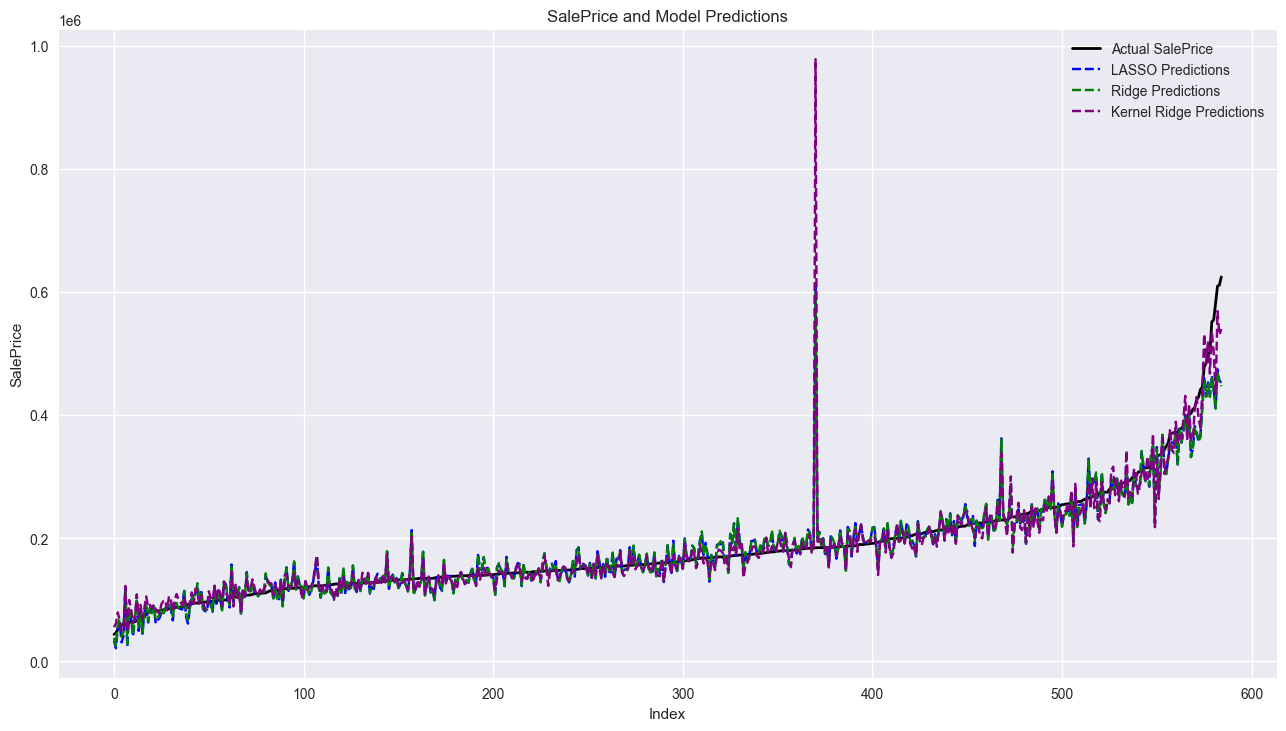

In [ ]:
sorted_indices = np.argsort(y_test)
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_lasso_sorted = y_pred_lasso[sorted_indices]
y_pred_ridge_sorted = y_pred_ridge[sorted_indices]
y_pred_kr_sorted = y_pred_kernel[sorted_indices]

# Plot the actual SalePrice and the predictions
plt.figure(figsize=(14, 8))

plt.plot(y_test_sorted.values, label='Actual SalePrice', color='black', linewidth=2)
plt.plot(y_pred_lasso_sorted, label='LASSO Predictions', color='blue', linestyle='--')
plt.plot(y_pred_ridge_sorted, label='Ridge Predictions', color='green', linestyle='--')
plt.plot(y_pred_kr_sorted, label='Kernel Ridge Predictions', color='purple', linestyle='--')

plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.title('SalePrice and Model Predictions')
plt.legend()
plt.show()

In [ ]:
#Riccardo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"Ridge Regression - Prediction Accuracy (R² = {ridge_r2:.2f})")
plt.legend()
plt.show()

In [ ]:
#Riccardo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.6, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"Lasso Regression - Prediction Accuracy (R² = {lasso_r2:.2f})")
plt.legend()
plt.show()

In [ ]:
#Riccardo
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_kernel, color='blue', alpha=0.6, label='Predicted vs True')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"Kernel Ridge Regression - Prediction Accuracy (R² = {kernel_r2:.2f})")
plt.legend()
plt.show()